In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from weasyprint import HTML as HTML1
from flutype_analysis import analysis, utils, pca, correlation

In [4]:
data_id = "2018-01-24_E14_X31" 
directory = "../data/2018-01-24_E14_X31"
data = utils.load_data(data_id, directory)
ana = analysis.Analysis(data)
display(ana.spot.head(10))


--------------------------------------------------------------------------------
Loading data corresponding to data_id: <2018-01-24_E14_X31> in dir <../data/2018-01-24_E14_X31>
--------------------------------------------------------------------------------
Virus .gal:../data/2018-01-24_E14_X31/2018-01-24_E14_X31_vir.gal
Peptide .gal :../data/2018-01-24_E14_X31/2018-01-24_E14_X31_pep.gal
Spot intensity file  :../data/2018-01-24_E14_X31/2018-01-24_E14_X31.csv
Image file  :../data/2018-01-24_E14_X31/2018-01-24_E14_X31_600_100_635.tif
Spot intensities for the data ID (2018-01-24_E14_X31) are not averaged but primary values


,Column,Row,Peptide,Reference,Virus,Buffer,No_Peptide,Intensity,Std,Replica
0,1,1,No,False,X31A,False,False,207673,NaN,0
1,1,2,Pep 10_1.0,False,X31A,False,False,339995,NaN,0
2,1,3,Pep 13_0.5,False,X31A,False,False,184272,NaN,0
3,1,4,Pep 49_0.25,False,X31A,False,False,268142,NaN,0
4,1,5,LF_1.0,False,X31A,False,False,210777,NaN,0
5,1,6,Pep 12_0.5,False,X31A,False,False,208034,NaN,0
6,1,7,Pep 6_0.25,False,X31A,False,False,197051,NaN,0
7,1,8,Pep 61_1.0,False,X31A,False,False,384049,NaN,0
8,1,9,Pep 11_0.5,False,X31A,False,False,319873,NaN,0
9,1,10,Pep 14_0.25,False,X31A,False,False,263114,NaN,0


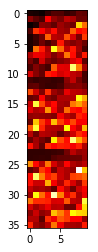

In [17]:
plt.imshow(ana.spot.pivot(index='Row', columns='Column',
                                      values='Intensity'), interpolation='nearest',
                    cmap="hot")
plt.show()

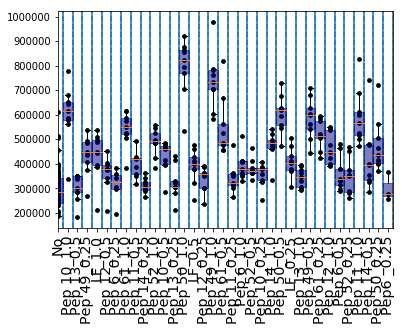

In [27]:
from matplotlib.figure import Figure
import numpy as np
fig = Figure()
ax2 = fig.add_subplot(111)
ax = ax2.twiny()

# for x-axis ticks and labels
peptide_ticks_x_axis = []
peptide_label_x_axis = []

virus_ticks_x_axis = []
virus_label_x_axis = []

cmap = plt.get_cmap('jet')
Nvirus = len(ana.spot["Virus"].unique())
Npeptides = len(ana.spot["Peptide"].unique())

# peptide aligned
spacing = 1.0/Nvirus
for index_peptide, peptide in enumerate(ana.spot["Peptide"].unique()):
    for index_virus, virus in enumerate(ana.spot["Virus"].unique()):
        plt.axvline(x=[index_peptide + index_virus * spacing + spacing * 0.5 ], linestyle='dashed')
        # add x-tick position and label for virus
        virus_ticks_x_axis.append(index_peptide + index_virus * spacing)
        virus_label_x_axis.append(virus)
        data=ana.spot.loc[(ana.spot['Peptide'] == peptide) & (ana.spot["Virus"] == virus)]["Intensity"]
        #print(data)
        data_std=ana.spot.loc[(ana.spot['Peptide'] == peptide) & (ana.spot["Virus"] == virus)]["Std"]

        plt.scatter(index_peptide  * np.ones(data.shape) + index_virus * spacing, data,
                   s=500/(Nvirus*Npeptides), color='k', marker='o')
        if len(data) > 1:
            bp = plt.boxplot(data.values, positions=[index_peptide+index_virus*spacing],
                             patch_artist=True, showfliers=False,widths=spacing)
            plt.setp(bp['boxes'], color=cmap(index_virus*1.0 / Nvirus), alpha=0.5)

    # add x-tick position and label for peptide
    peptide_ticks_x_axis.append(index_peptide + 0.5 - spacing * 0.5)
    peptide_label_x_axis.append(peptide)
    #draw vertical line to seperate peptides
    plt.axvline(x=index_peptide + 1 - spacing * 0.5 )

# setup upper x-axis
plt.xticks(peptide_ticks_x_axis,peptide_label_x_axis,fontsize="x-large",rotation=90)
ax.set_xlim(-0.5*spacing , index_peptide + 1 - spacing * 0.5 )


# setup lower x-axis
ax2.set_xticks(virus_ticks_x_axis)
#["peptide " + str(s) for s in output.columns]
ax2.set_xticklabels(virus_label_x_axis,rotation=90, fontsize="x-small" )
plt.show()

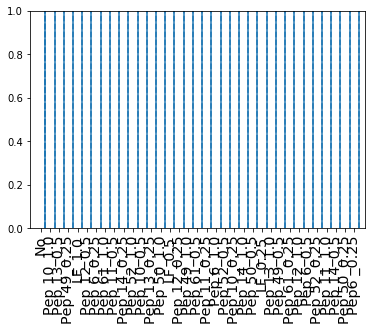